Wine Quality Prediction
1. Importing Libraries
We start by importing the required libraries for:
- Data handling → NumPy, Pandas  
- Visualization → Seaborn, Matplotlib  
- Machine Learning → scikit-learn (train-test split, RandomForestClassifier, accuracy score)



In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## 2. Loading the Dataset
The dataset `winequality-red.csv` contains physicochemical properties of red wines along with a quality score (0–10).
We load the dataset and preview the first few rows.


In [40]:
df=pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


3. Dataset Overview
We check:
- Shape of the dataset (rows × columns)  
- Distribution of the target variable `quality`  
- Missing values in the dataset


In [41]:
df.shape

(1599, 12)

In [42]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [43]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Data Analysis and Visualization

In [44]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


 Data Analysis: Target Variable Distribution
The target variable `quality` represents the wine rating on a scale from 0 to 10.  
Before modeling, we analyze the distribution of wine qualities.

- Most wines fall in the range of 5–6.  
- Very few wines are rated extremely low (3–4) or high (8+).  
- This shows that the dataset is **imbalanced**, which can affect model performance.


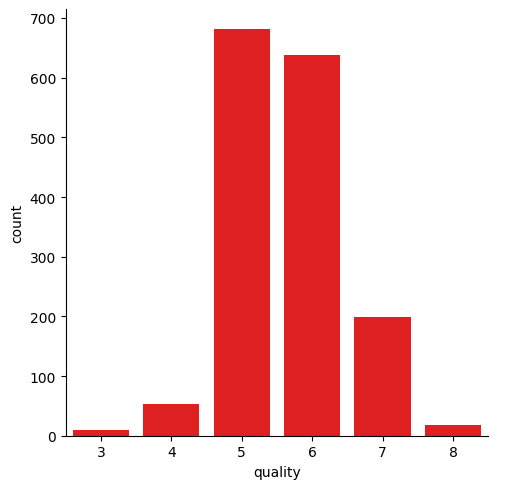

In [46]:
sns.catplot(x='quality', data=df, kind='count', color='red')

 Feature Distributions
We analyze the distribution of numerical features such as acidity, sugar, alcohol, etc.  
This helps us understand the data spread and detect outliers.

- **Alcohol content** is an important factor – higher alcohol often corresponds to better quality.  
- **Volatile acidity** has a negative impact on quality when values are high.  
- **Citric acid** and **sulphates** also show influence on wine quality.  


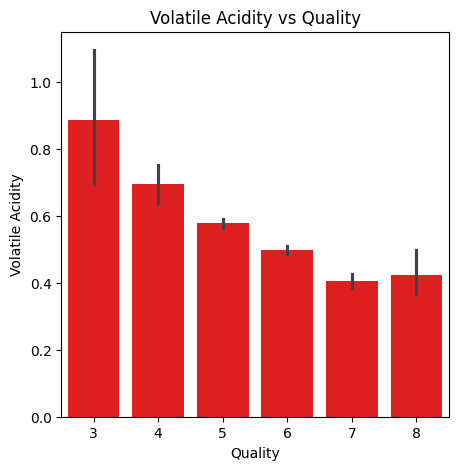

In [47]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='volatile acidity' , data=df , color ='red')
plt.xlabel('Quality')
plt.ylabel("Volatile Acidity")
plt.title("Volatile Acidity vs Quality")
plt.show()

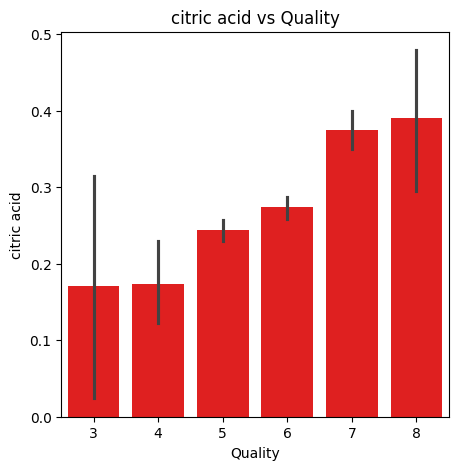

In [48]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='citric acid' , data=df , color ='red')
plt.xlabel('Quality')
plt.ylabel("citric acid")
plt.title("citric acid vs Quality")
plt.show()

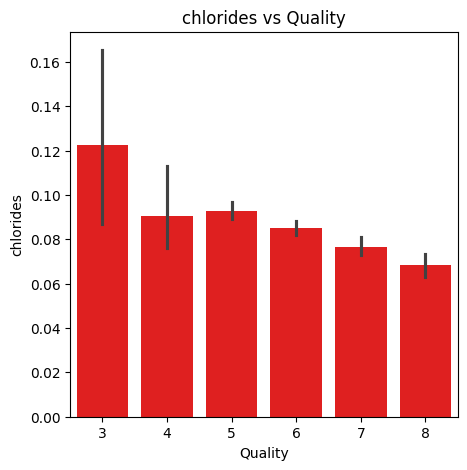

In [49]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='chlorides' , data=df , color ='red')
plt.xlabel('Quality')
plt.ylabel("chlorides")
plt.title("chlorides vs Quality")
plt.show()

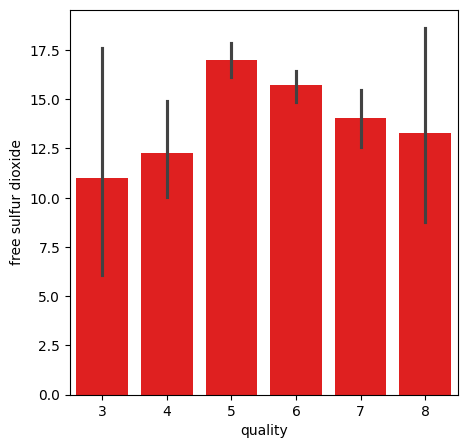

In [50]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='free sulfur dioxide' , data=df , color ='red')
plt.show()

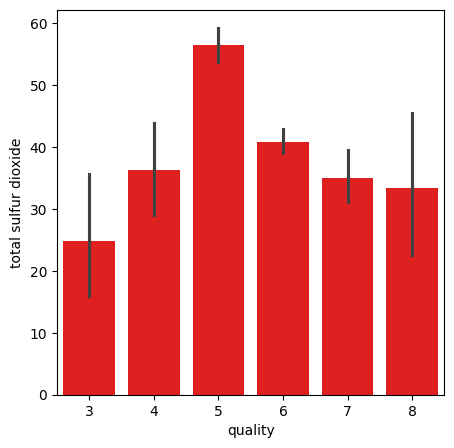

In [51]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='total sulfur dioxide' , data=df , color ='red')
plt.show()

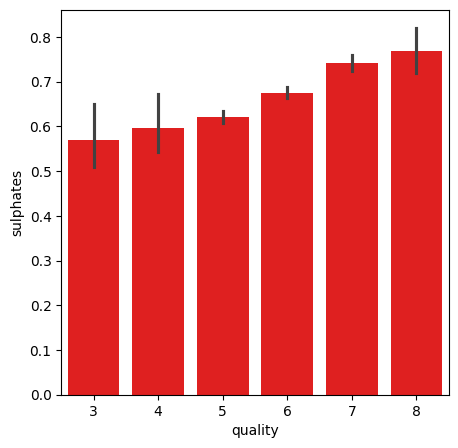

In [52]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='sulphates' , data=df , color ='red')
plt.show()

Correlation Analysis
To understand how different chemical properties impact wine quality,  
we calculate the correlation matrix and visualize it using a heatmap.

- Features like **alcohol** and **volatile acidity** tend to have stronger correlations with wine quality.  
- Features such as **residual sugar** and **chlorides** show weaker correlations.  


<Axes: >

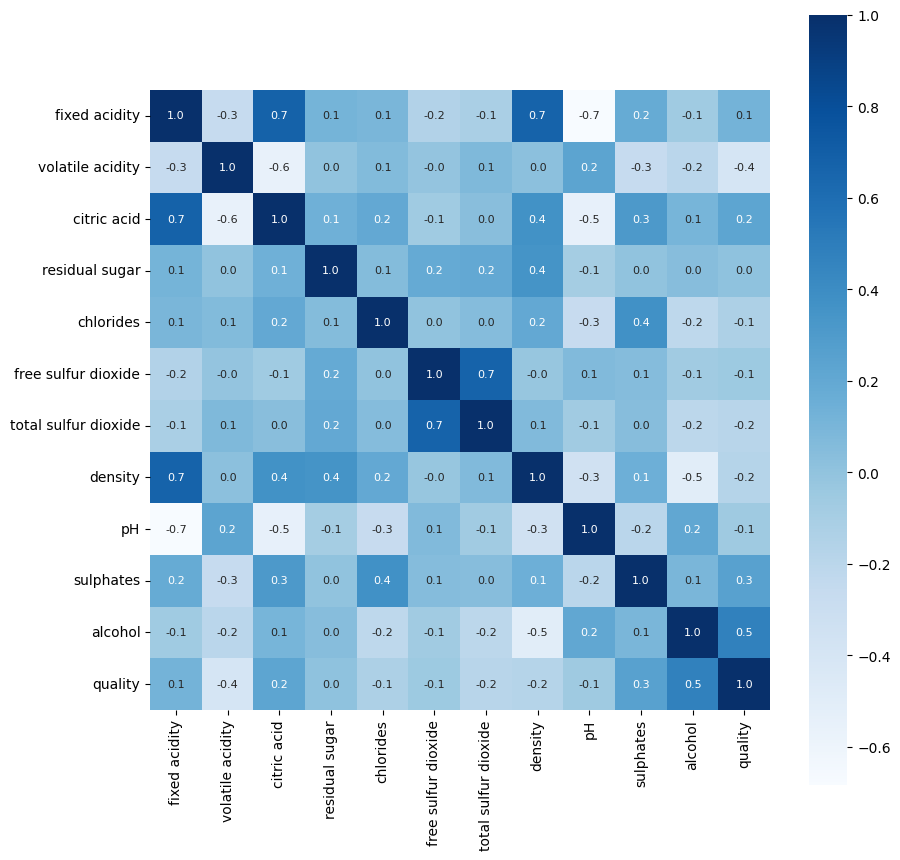

In [53]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f' ,annot=True , annot_kws={'size':8}, cmap='Blues')


5. Feature and Target Split
We separate the dataset into:
- **Features (X):** physicochemical properties of wine  
- **Target (y):** wine quality (Good/Bad)  


In [80]:
X=df.drop(columns='quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


6. Data Preprocessing
The target variable `quality` is a multi-class rating (0–10).  
For simplification, we convert it into **binary classes**:
- Good Quality Wine → `1`  
- Bad Quality Wine → `0`  

This helps in building a binary classification model.

In [58]:
y=df['quality'].apply(lambda y_value: 1 if y_value >=7 else 0 )
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


7. Train-Test Split
We split the dataset into training and testing sets to evaluate the model’s generalization capability.


In [72]:
X_train , X_test , y_train, y_test =train_test_split(X , y , test_size = 0.3, stratify = y, random_state=42)

In [73]:
print(X.shape , y.shape, X_train.shape, X_test.shape)

(1599, 11) (1599,) (1119, 11) (480, 11)


8. Model Training
We use a **Random Forest Classifier**, a robust ensemble learning method that works well for classification tasks.  
The model is trained on the training data.


In [74]:
model = RandomForestClassifier()

In [75]:
model.fit(X_train, y_train)

RandomForestClassifier()

9. Model Evaluation
We evaluate the model using **accuracy score**:
- Training Accuracy  
- Testing Accuracy  

This helps us check for overfitting/underfitting.


In [76]:
X_train_prediction = model.predict(X_train)
traning_accuracy=accuracy_score(X_train_prediction , y_train)
print("The accuracy on traning datasets is :", traning_accuracy)

The accuracy on traning datasets is : 1.0


In [77]:
X_test_prediction = model.predict(X_test)
testing_accuracy=accuracy_score(X_test_prediction , y_test)
print("The accuracy on testing datasets is :", testing_accuracy)

The accuracy on testing datasets is : 0.9291666666666667


10. Making Predictions
We test the model with custom input data (chemical properties of wine).  
The model outputs whether the wine is **Good Quality (1)** or **Bad Quality (0)**.


In [84]:
input_data=(11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [87]:
input_data=(9.6,0.32,0.47,1.4,0.055999999999999994,9.0,24.0,0.99695,3.22,0.82,10.3)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


 10. Conclusion
- We successfully built a **Wine Quality Prediction Model** using Random Forest.  
- The model predicts whether wine is of good or bad quality based on its physicochemical properties.  
- Next Steps:
  - Add more models (Logistic Regression, Gradient Boosting, SVM) for comparison  
  - Use advanced evaluation metrics (Confusion Matrix, Precision, Recall, F1-score)  
  - Visualize feature importance to understand which wine properties affect quality most  
